In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('wholesale_customers_data.csv')
df.sample(n=8)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
90,1,3,11405,596,1638,3347,69,360
126,1,3,19219,1840,1658,8195,349,483
403,1,3,25606,11006,4604,127,632,288
303,2,2,2599,3688,13829,492,10069,59
124,1,3,36050,1642,2961,4787,500,1621
372,1,3,3884,3801,1641,876,397,4829
315,2,2,1479,14982,11924,662,3891,3508
416,2,3,4389,10940,10908,848,6728,993


In [3]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [4]:
df.shape

(440, 8)

In [5]:
data = df.copy()

for cols in data.columns[2:]:
  Q1 = data[cols].quantile(0.25)
  Q3 = data[cols].quantile(0.75)
  iqr = Q3 - Q1

  low = Q1-1.5*iqr
  high = Q3+1.5*iqr
  data.loc[(data[cols] < low) | (data[cols] > high), cols] = data[cols].median()

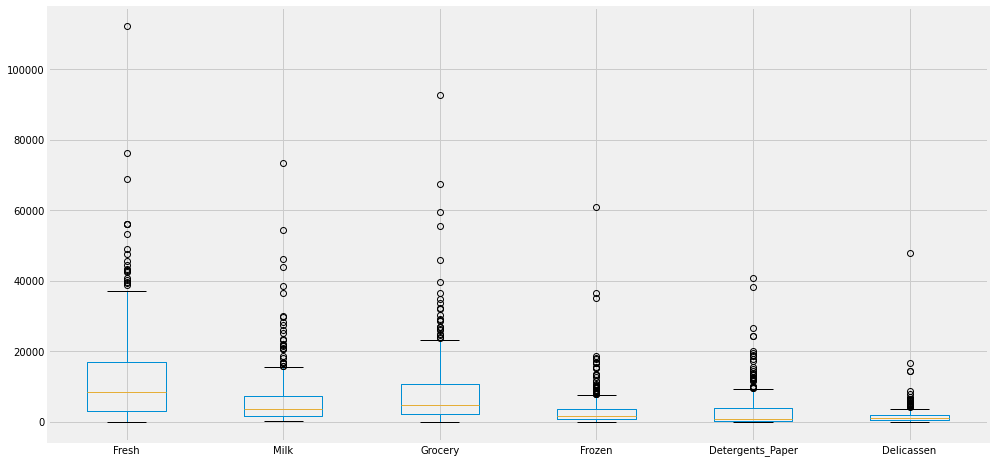

In [15]:
df.iloc[:, 2:].boxplot(figsize=(15,8))

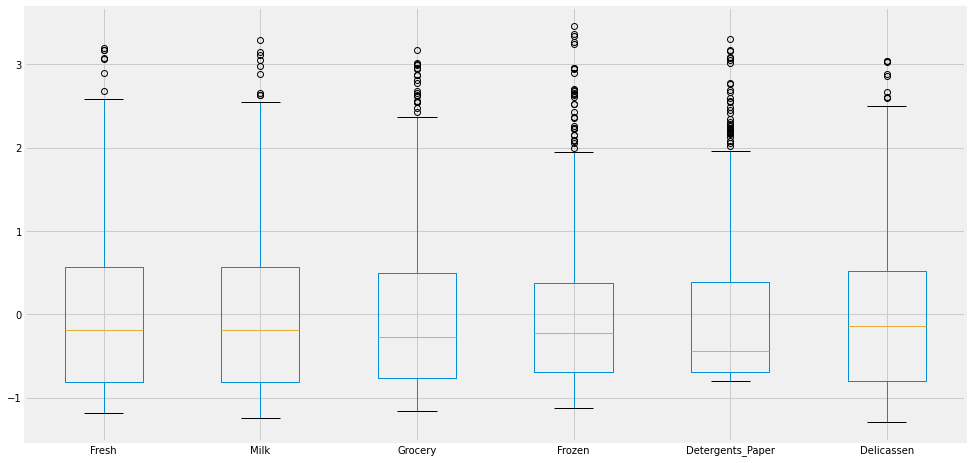

In [14]:
data.iloc[:, 2:].boxplot(figsize=(15,8))

In [7]:
from scipy.stats import zscore


data = data.apply(zscore)
data = pd.DataFrame(data, columns=df.columns)
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219
1,1.448652,0.590668,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978
2,1.448652,0.590668,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514
3,-0.690297,0.590668,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273
4,1.448652,0.590668,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514


In [8]:
data.shape

(440, 8)

In [9]:
from sklearn.cluster import KMeans

best_k = []

for k in range(1, 21):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data)
  # y_pred = kmeans.fit_predict(data)
  best_k.append([k, kmeans.inertia_])

best_k

[[1, 3519.9999999999986],
 [2, 2480.258010429313],
 [3, 2172.8488252249253],
 [4, 1943.7345516662483],
 [5, 1776.407350871652],
 [6, 1623.913155799998],
 [7, 1527.5465926688182],
 [8, 1450.4147192783157],
 [9, 1376.4571708552419],
 [10, 1320.363987917949],
 [11, 1270.5143254484308],
 [12, 1210.122186200394],
 [13, 1154.530742644496],
 [14, 1128.6584209750263],
 [15, 1093.6139132957894],
 [16, 1075.1827246475204],
 [17, 1032.7547783120845],
 [18, 1012.017752900843],
 [19, 978.7902467975888],
 [20, 956.6777950178638]]

In [10]:
best_k = pd.DataFrame(best_k, columns=['k', 'distance'])
best_k


,k,distance
0,1,3520.000000
1,2,2480.258010
2,3,2172.848825
3,4,1943.734552
4,5,1776.407351
5,6,1623.913156
6,7,1527.546593
7,8,1450.414719
8,9,1376.457171
9,10,1320.363988


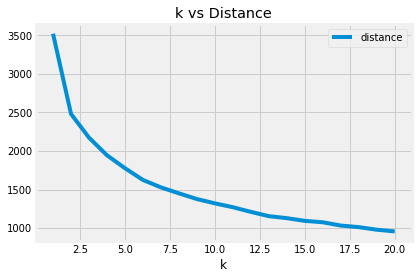

In [11]:
best_k.plot(
    title='k vs Distance',
    x='k',
    y='distance',
    # color='k',
)

In [12]:
kmeans = KMeans(n_clusters=6, random_state=42)
# y_pred = kmeans.fit_predict(data)
kmeans.fit(data)
y_pred = kmeans.predict(data)

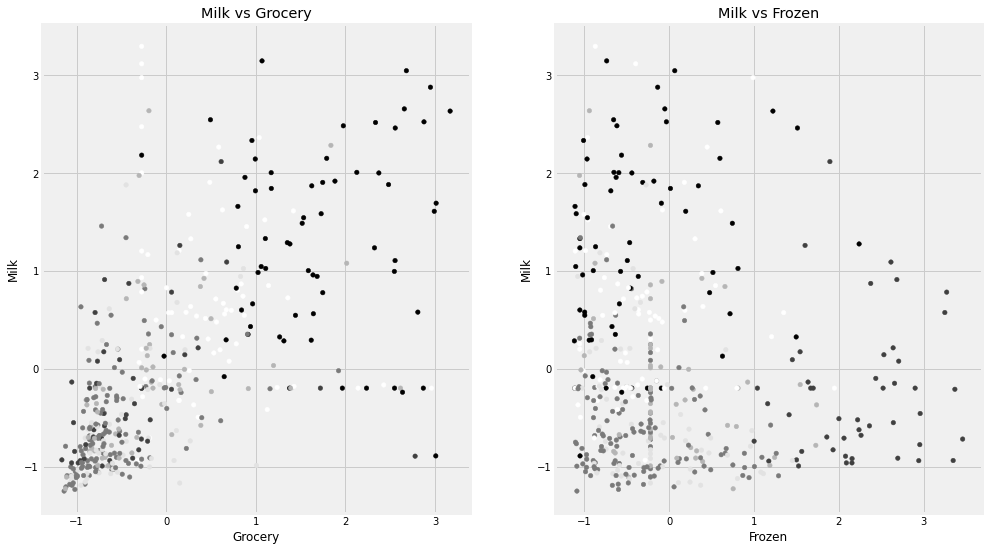

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 9))
data.plot(
    kind='scatter',
    title='Milk vs Grocery',
    x='Grocery',
    y='Milk',
    c=y_pred,
    s=20,
    ax=axs[0],
)

data.plot(
    kind='scatter',
    title='Milk vs Frozen',
    x='Frozen',
    y='Milk',
    c=y_pred,
    s=20,
    ax=axs[1],
)